<a href="https://colab.research.google.com/github/nguyen084/MATH5670/blob/master/MATH5670_Assignment011_Group005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [54]:
#Question 1: Import data (0.5)
import os
import pandas as pd
os.chdir(r'/content/gdrive/My Drive/Academic/UCONN/Financial Research/MATH5671/')
df = pd.read_csv("training_data.csv",header =0)
df.head()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,5,3,6,6,101.73,6,43173
1,3,3,7,9,36595.09,1462,7765626
2,5,6,3,9,359.57,26,139072
3,3,3,7,2,1681.52,71,377529
4,5,2,3,9,612.27,64,228163


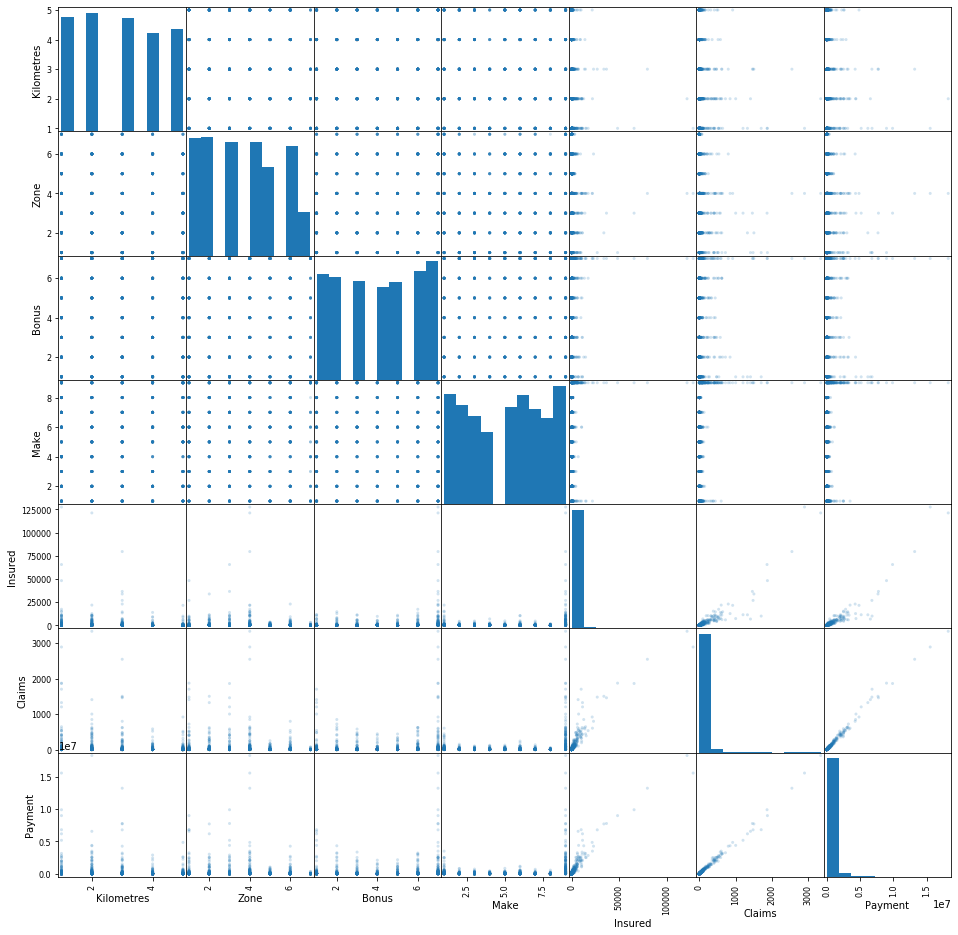

In [3]:
#Question 2: Scatter Plot (0.5)
scatterplot = pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(16,16))

Based on the scatterplot above, one can observe such:

-positive correlaltion between payment and insured and claim

-light positive correlaation between payment vs make

-light negative correlation between payment vs kilometers.

Also the histograms are not normal distributed.



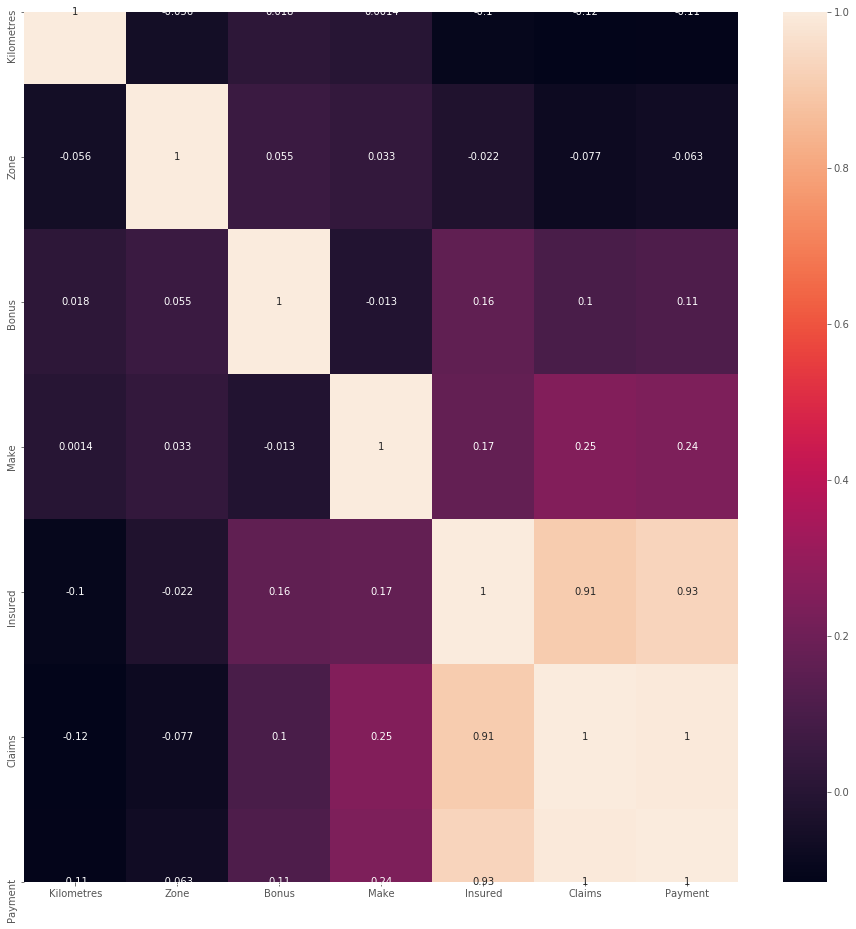

In [19]:
#Question 3: Correlation Map (0.5)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
plt.figure(figsize=(16, 16))
coremap = sns.heatmap(corr,annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Based on the correlation map above:

-Strong direct correlation between payment vs insured, and payment vs claim.

-Weak direct correlation between payment vs. make

-Strong direct correlation between claim vs. insured (suggests collinearity) 



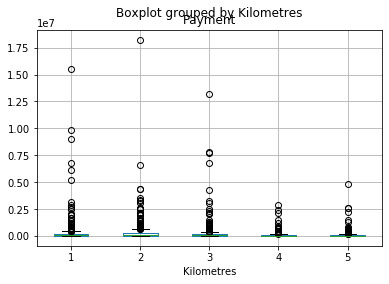

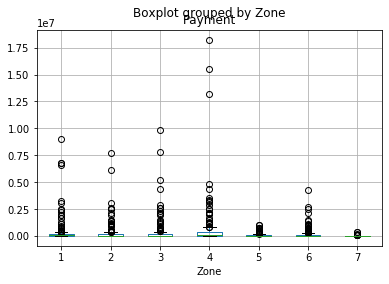

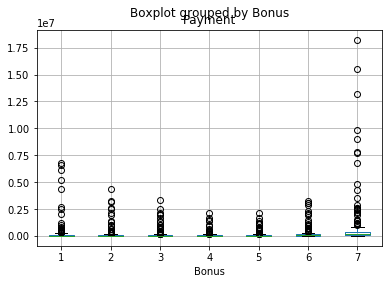

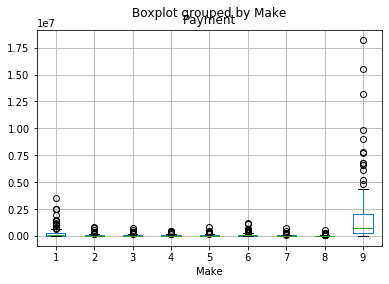

In [4]:
#Question 3: Box Plots (0.5)
for var in ['Kilometres','Zone','Bonus','Make']:
  boxplot = df.boxplot(column=['Payment'], by=var)

Based on those boxplots above, the distribution are not well distributed, thus, these variables are not good as input for our model.

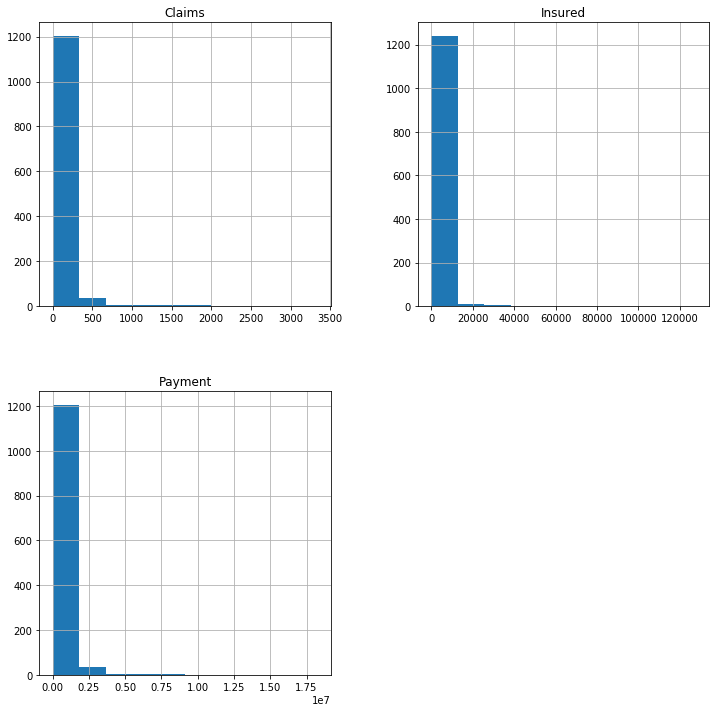

In [5]:
#Question 3: (Histogram Plots)
hist = df.hist(column=['Insured','Claims','Payment'],figsize=(12,12))

Based on the histograms above, we can see these are skew distributions, where most of the data are in the left hand side. This suggests that we should do some outliner analysis to remove some of the outliners and hope to get a more of normal distribution.

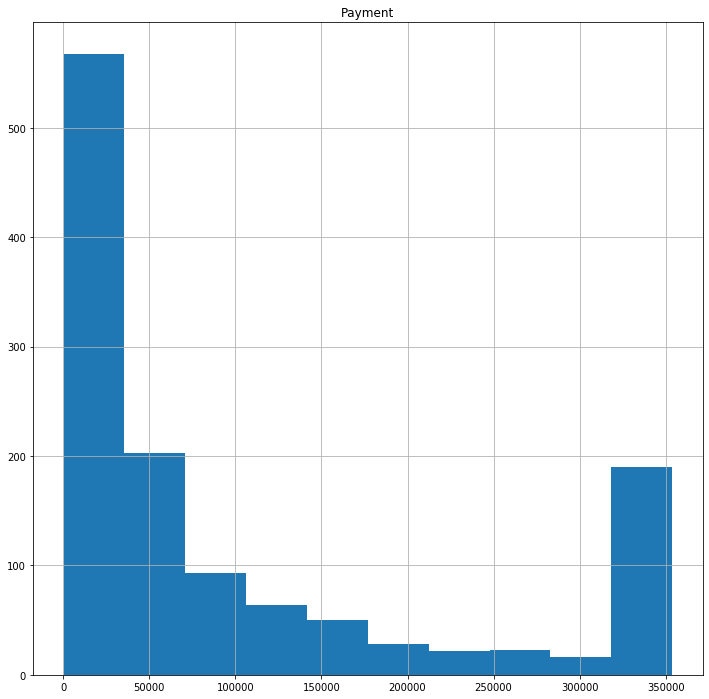

In [27]:
#Computer outliner (1)
# Computing IQR
Q1 = df['Payment'].quantile(0.25)
Q3 = df['Payment'].quantile(0.75)
IQR = Q3 - Q1
df.loc[df['Payment'] > Q3 + 1.5 * IQR, 'Payment'] = Q3 + 1.5 * IQR
df.loc[df['Payment'] < Q1 - 1.5 * IQR, 'Payment'] = Q1 - 1.5 * IQR
hist = df.hist(column=['Payment'],figsize=(12,12))

In [52]:
df.head(1)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,5,3,6,6,101.73,6,43173.0


In [8]:
#Run with all the variables
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
payment_model = ols("Payment ~ Insured + Claims + Kilometres + Zone + Bonus + Make", data=df).fit()
print(payment_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Payment   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.599e+04
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:50:11   Log-Likelihood:                -15880.
No. Observations:                1257   AIC:                         3.177e+04
Df Residuals:                    1250   BIC:                         3.181e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.814e+04   8523.267     -3.302      0.0

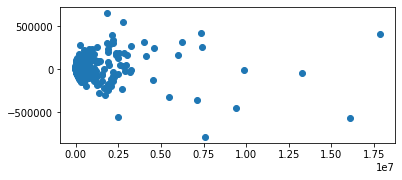

In [18]:
#Based on the R^2 value above, the model is well fitted. However, we still need to test for overfitting
#Below is the residual plot
pred_val = payment_model.fittedvalues.copy()
true_val = df['Payment'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred_val,residual)
#From the residual plot, the points ar more clustered in the central suggested there is some sort of pattern.
#This suggests that is model is not well suited, but we can try to test it with a test feature

In [0]:
testdf = pd.read_csv("test_features1.csv",header =0)
predictedval = payment_model.predict(testdf)
y_test_more_pred= pd.DataFrame(predictedval)
y_test_more_pred= y_test_more_pred.reset_index()
y_test_more_pred.columns = ['num','label']
y_test_more_pred['num'] = y_test_more_pred['num'] + 1
y_test_more_pred.to_csv(r'test_submission_model1.csv', index = False)

                            OLS Regression Results                            
Dep. Variable:            Payment_log   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1490.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:06:26   Log-Likelihood:                -1313.3
No. Observations:                1257   AIC:                             2641.
Df Residuals:                    1250   BIC:                             2676.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9007      0.086     91.381      0.0

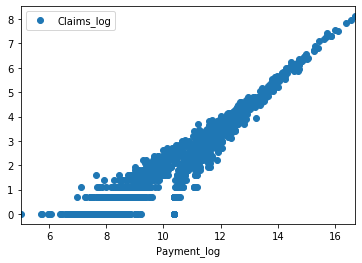

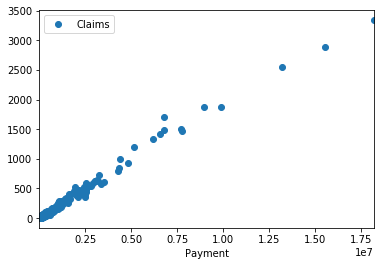

In [15]:
import math
#Here, we can try to use log transform that payment and claims since they has high correlation values
df['Claims_log']= df['Claims'].transform(lambda x: math.log(x));
df['Payment_log']= df['Payment'].transform(lambda x: math.log(x));
df.plot(x='Payment_log', y='Claims_log', style='o')
df.plot(x='Payment', y='Claims', style='o')
payment_model2 = ols("Payment_log ~ Insured + Claims_log + Kilometres + Zone + Bonus + Make", data=df).fit()
print(payment_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Payment_oneover   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sat, 16 Nov 2019   Prob (F-statistic):          3.57e-103
Time:                        22:07:56   Log-Likelihood:                 8540.0
No. Observations:                1257   AIC:                        -1.707e+04
Df Residuals:                    1250   BIC:                        -1.703e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.109e-05   3.11e-05      0.

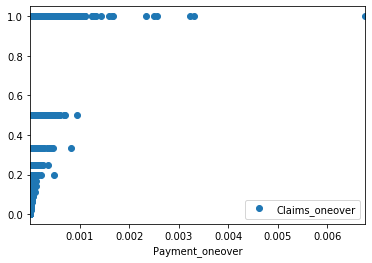

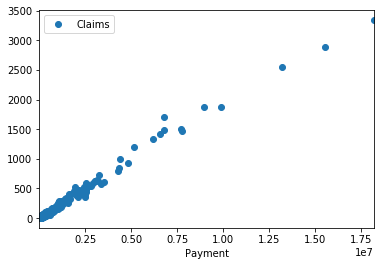

In [19]:
#Let try it with different transfromation
df['Claims_oneover']= df['Claims'].transform(lambda x: 1/x);
df['Payment_oneover']= df['Payment'].transform(lambda x: 1/x);
df.plot(x='Payment_oneover', y='Claims_oneover', style='o')
df.plot(x='Payment', y='Claims', style='o')
payment_model3 = ols("Payment_oneover ~ Insured + Claims_oneover + Kilometres + Zone + Bonus + Make", data=df).fit()
print(payment_model3.summary())

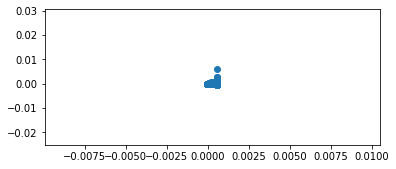

In [20]:
pred_val = payment_model3.fittedvalues.copy()
true_val = df['Payment_oneover'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(pred_val,residual)

In [0]:
#Based on the correlation plot earlier, we suspect that there are other dependent variables has a high correlation with
#each other, this susgest we need to fun colineality analysis to pick the right variables.
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('Payment ~ Insured + Claims + Kilometres + Zone + Bonus + Make', df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [24]:
vif.round(1)

,VIF Factor,features
0,16.5,Intercept
1,5.9,Insured
2,6.0,Claims
3,1.0,Kilometres
4,1.0,Zone
5,1.0,Bonus
6,1.1,Make


In [25]:
#As expected, claims and insured variables has high correlation with each other, so we can try to eliminated one of them and recompute the regresssion
payment_model_vif1 = ols("Payment ~ Claims + Kilometres + Zone + Bonus + Make", data=df).fit()
print(payment_model_vif1.summary())

                            OLS Regression Results                            
Dep. Variable:                Payment   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.662e+04
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:17:34   Log-Likelihood:                -16335.
No. Observations:                1257   AIC:                         3.268e+04
Df Residuals:                    1251   BIC:                         3.271e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.046e+04   1.22e+04     -4.966      0.0

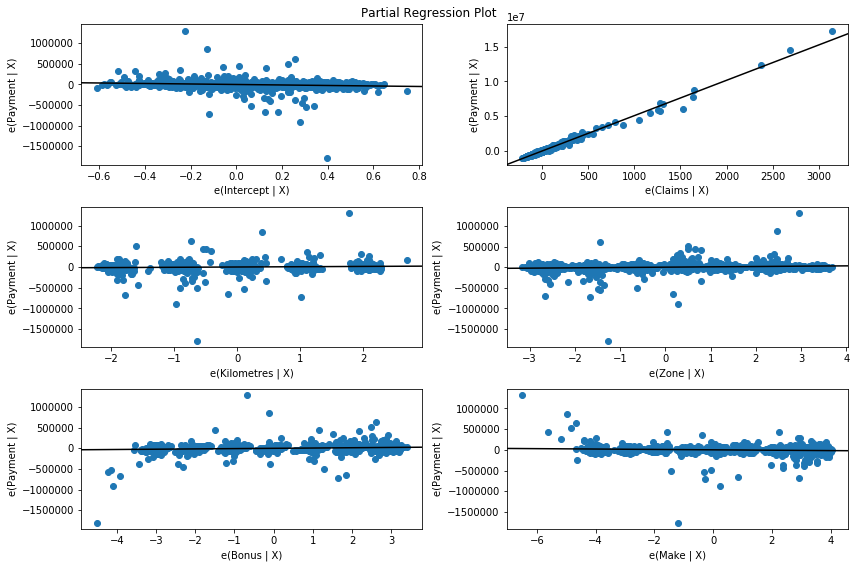

In [26]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(payment_model_vif1, fig=fig)

                            OLS Regression Results                            
Dep. Variable:                Payment   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1203.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:04:29   Log-Likelihood:                -12668.
No. Observations:                1081   AIC:                         2.535e+04
Df Residuals:                    1075   BIC:                         2.538e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3249.2768   3807.580     -0.853      0.3

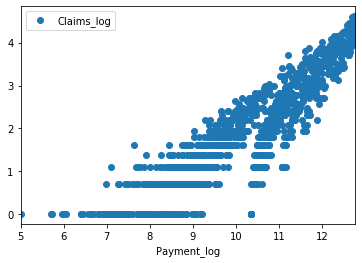

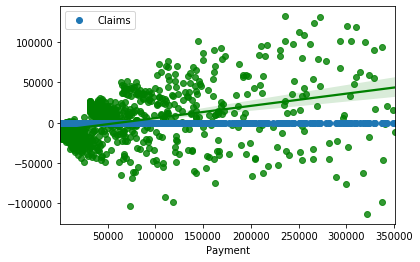

In [64]:
#Now, let try to get the residual plot smooth out with more transformation
# Q1 = df['Payment'].quantile(0.25)
# Q3 = df['Payment'].quantile(0.75)
# IQR = Q3 - Q1
# df.loc[df['Payment'] > Q3 + 1.5 * IQR, 'Payment'] = np.nan
# df.loc[df['Payment'] < Q1 - 1.5 * IQR, 'Payment'] = np.nan
# df = df.dropna()
# df['Claims_log']= df['Claims'].transform(lambda x: math.log(x));
# # df['Payment_oneover']= df['Payment'].transform(lambda x: 1/x);
df['Payment_log']= df['Payment'].transform(lambda x: math.log(x));
df.plot(x='Payment_log', y='Claims_log', style='o')
df.plot(x='Payment', y='Claims', style='o')
payment_model_4 = ols("Payment ~  Claims + Kilometres + Zone + Bonus + Make", data=df).fit()
print(payment_model_4.summary())
pred_val = payment_model_4.fittedvalues.copy()
true_val = df['Payment'].values.copy()
residual = true_val - pred_val
# fig, ax = plt.subplots(figsize=(6,2.5))
# _ = ax.scatter(pred_val,residual)
import seaborn as sns
sns.regplot(x=true_val, y=residual, color="g")

In [65]:
'''
After numererous attempts, we cannot fix the residual plots. But the best we can do is to not transform any data,
and instead of capping the outliner, we elimited them all. The residual plot suggests that the Assumption of Constant Variance is Not Valid,
thus there is a need to futhur investigate
Based on the final model we can conclude that our model has the R^2 of .84, and the variables Claims is significantly influane our dependent
variable with the t value of 73. Thus, as claims in increase, then payment also linearly increases.
We can express the model as this:
Payment = -3449 + 4332(Claims) + 1306(Kilometres) + 650 (Zone) + 1419 (Bonus) - 548 (Make)
'''
payment_model_4.params

Intercept    -3249.276809
Claims        4332.072184
Kilometres    1306.500057
Zone           650.620486
Bonus         1419.317785
Make          -548.814547
dtype: float64

In [0]:
#From this, we can attempt to test to the test features again
#Also, our model does not need transformation so we can skip the reverse transformation steps.
predictedval = payment_model_4.predict(testdf)
y_test_more_pred= pd.DataFrame(predictedval)
y_test_more_pred= y_test_more_pred.reset_index()
y_test_more_pred.columns = ['num','label']
y_test_more_pred['num'] = y_test_more_pred['num'] + 1
y_test_more_pred.to_csv(r'test_submission_model4.csv', index = False)

In [68]:
y_test_more_pred.head(5)

,num,label
0,1,22223.923711
1,2,9543.643145
2,3,29030.769454
3,4,11799.027571
4,5,28816.639406


In [0]:
#After submission, we got 172342